# GAN

__["Generative Adversarial Nets"](https://papers.nips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf)__

_Yann LeCun: "The most interesting idea in the last 10 years in Machine Learning."_

## A new type of generative models

How can we generate data when the __pdf is intractable__ at all?

Don't model the pdf explicitly, __learn the pdf implicitly__:

<img src="images/gm_taxonomy.png" width="600pt"/>

To this aim, define a new target: __maximize indistinguishability__ of generated samples.

Idea, use a strategy similar to the __Turing test__:

<img src="images/turing_test.png" width="300pt"/>

# Generator task

__Transform a chosen distribution (noise) into the data distribution__.

<img src="images/gan_generator_task.png" width="600pt"/>

Recipe for __samples generation__:

- __generate a latent__ vector from a simple distribution (eg. $h\sim\mathcal{N}$);
- __transform it__ in the target distribution (eg. $\hat{x}=g(h)$).

## GAN architecture

Recipe for __training the generator__, use two ANN players in this game:

- _generator (G)_: generates fake images (like a decoder) to fool D;
- _discriminator (D)_: binary classifier distinguishing fakes (0) from real images (1).

<img src="images/gan.png" width="600pt"/>

## The minimax game

Two __opposite forces__ work in the GAN: D and G.

It is a __min-max problem__:

$$
\Large V(D,G) = \Large \min_G\max_D \mathbb{E}_x[\log D(x)] + \mathbb{E}_z[\log\left(1-D(G(z))\right)]
$$

where in the maximization step $\max_D$:

- the first term forces $D$ to recognize reals;
- the second term forces $D$ to recognize fakes;

whilst in the minimization step $\min_G$:

- the first term is not considered (it is a constant wrt $G$);
- the second term forces $G$ to generate better fakes.


Data | Classifier | Gradients
:-: | :-: | :-:
<img src="images/GAN_ex_data.png" width="300pt"/> | <img src="images/GAN_ex_D.png" width="300pt"/> | <img src="images/GAN_ex_grad.png" width="300pt"/>

Play with GANs [here](https://poloclub.github.io/ganlab/).

In [1]:
%load_ext autoreload

Generator parameters: 10747
Discriminator parameters: 6269


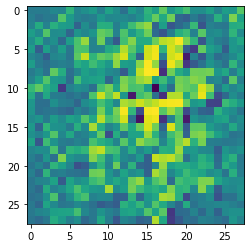

Epoch: 1, losses (G,Dtr,Dte): 0.8833019664801006, 0.641632881627154, 0.7071952527495706, 


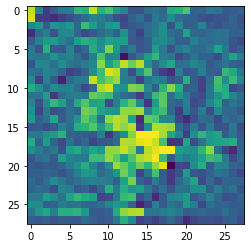

Epoch: 2, losses (G,Dtr,Dte): 1.0741703543962955, 0.5821598763150702, 0.6586578382048637, 


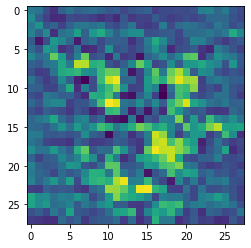

Epoch: 3, losses (G,Dtr,Dte): 1.1226402835042746, 0.5887168737362697, 0.5168833956596958, 


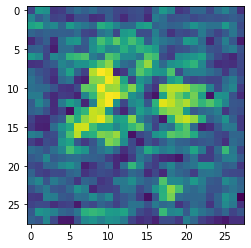

Epoch: 4, losses (G,Dtr,Dte): 1.2791197120126632, 0.5228758870697479, 0.44788361753627753, 


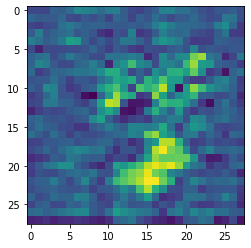

Epoch: 5, losses (G,Dtr,Dte): 1.5690290199668169, 0.43590158003289053, 0.4926091529381503, 


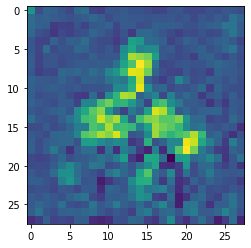

Epoch: 6, losses (G,Dtr,Dte): 1.8691467600844816, 0.3743453742757535, 0.391175889095683, 


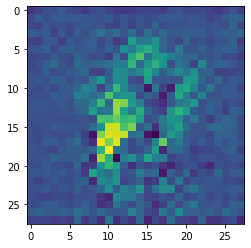

Epoch: 7, losses (G,Dtr,Dte): 1.9974798754588374, 0.34060991649180333, 0.1359685638053402, 


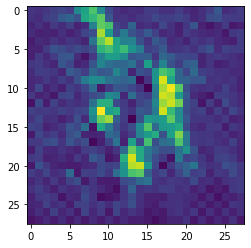

Epoch: 8, losses (G,Dtr,Dte): 2.441997261570969, 0.2445557317944732, 0.3263518156329538, 


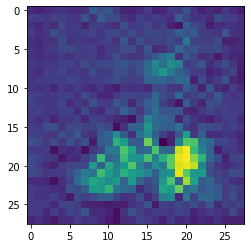

Epoch: 9, losses (G,Dtr,Dte): 2.4719442609530775, 0.2924726170453944, 0.15006356797875112, 


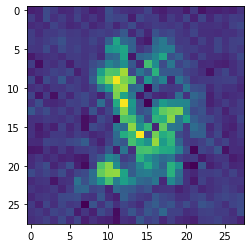

Epoch: 10, losses (G,Dtr,Dte): 2.551713655498236, 0.24130856740608145, 0.28522504790193715, 


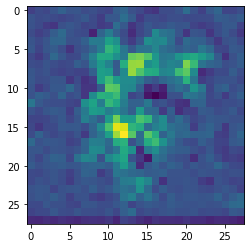

Epoch: 11, losses (G,Dtr,Dte): 2.846071431885904, 0.19730311649233928, 0.1730083144584279, 


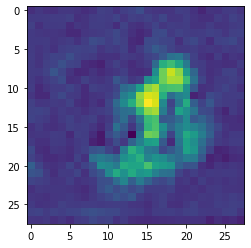

Epoch: 12, losses (G,Dtr,Dte): 2.984061885108826, 0.17713704576560937, 0.04978614683696039, 


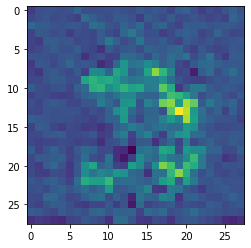

Epoch: 13, losses (G,Dtr,Dte): 3.1985585029953834, 0.157013801683082, 0.14250282893420024, 


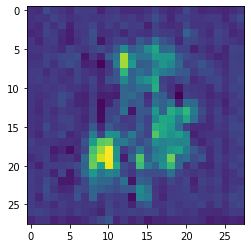

Epoch: 14, losses (G,Dtr,Dte): 3.460959840939243, 0.14012944762573154, 0.14051828182237164, 


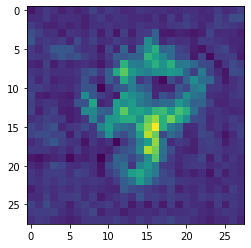

Epoch: 15, losses (G,Dtr,Dte): 3.589033880594697, 0.11832835612548535, 0.12985026736737817, 


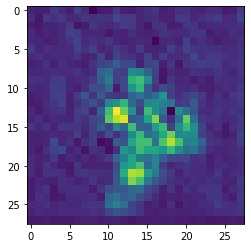

Epoch: 16, losses (G,Dtr,Dte): 3.6872371783388704, 0.12893233106219407, 0.23224110153924887, 


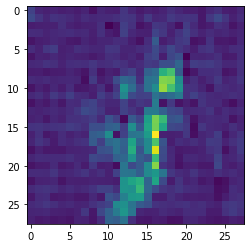

Epoch: 17, losses (G,Dtr,Dte): 3.658013314072257, 0.10512865868373228, 0.0784528881762248, 


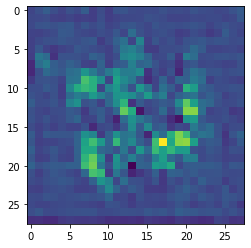

Epoch: 18, losses (G,Dtr,Dte): 3.7172530302360878, 0.1340001040031073, 0.10546021856320133, 


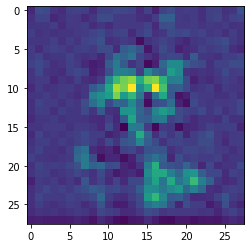

Epoch: 19, losses (G,Dtr,Dte): 3.7513681871296245, 0.11150576821022005, 0.058939981155666954, 


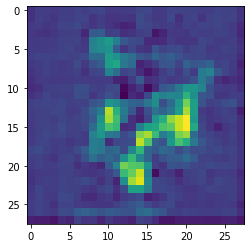

Epoch: 20, losses (G,Dtr,Dte): 3.752007412885044, 0.1259671084320685, 0.07875129264915824, 


In [10]:
%autoreload

from GAN import train

# Training a GAN on MNIST:
generator, discriminator, fakes, \
train_generator_losses, train_discriminator_losses, test_discriminator_losses = train(
    epochs=20,
    batch_size=64,
    lr_generator=3e-4,
    lr_discriminator=3e-4,
)

In [11]:
from GAN import save_model

losses = [train_generator_losses, train_discriminator_losses, test_discriminator_losses]
save_model(
    'generated/gan/',
    generator, discriminator,
    fakes, losses
)

In [1]:
from WGAN import Critic, Generator
from GAN import load_model

generator, discriminator, fakes, losses = load_model(
    'generated/gan/', Generator(), Critic())
train_generator_losses, train_discriminator_losses, test_discriminator_losses = losses

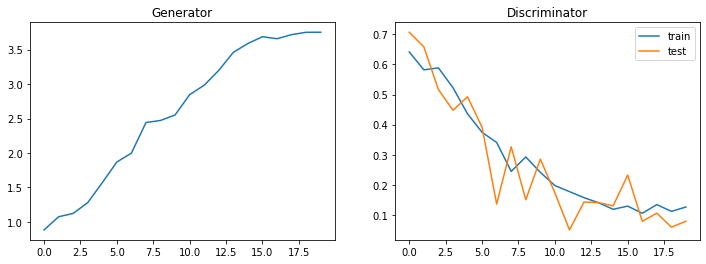

In [13]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(train_generator_losses)
ax[0].set_title('Generator')
ax[1].plot(train_discriminator_losses)
ax[1].plot(test_discriminator_losses)
ax[1].set_title('Discriminator')
ax[1].legend(['train','test']);

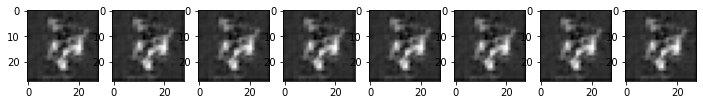

In [3]:
import torch
from matplotlib import pyplot as plt

# Generating data:
n = 8
xfake = generator(torch.rand((n,16)))
_, ax = plt.subplots(1, n, figsize=(12,4))
with torch.no_grad():
    for i in range(n):
        img = xfake[i]
        ax[i].imshow(img.permute(1,2,0), cmap='gray')

## Considerations

The training is __really unstable__:

- convergence is proved in the paper...
- ...but it is difficult to be achieved in practice;
- with mode collapse the generator does not cover the real distribution;
- vanishing gradients stop training on one or the other network.

After the first proposed version, many improvements have been proposed.  
__The Wasserstein loss faces these problems in the WGAN.__